In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
data = pd.read_csv('Filtering/data.csv', on_bad_lines='skip')
# data.set_index('sku', inplace = True)
X = np.array(data.name)
data


,sku,name,description,price,url_key,status,stock_status,fabricants,licences,themes,type_de_produits
0,0-74427-85980-0,"DECK BOX DRAGON BALL SUPER - Goku, Vegeta, and...",NaN,4.5,deck-box-dragon-ball-super-broly-full-power-2,1,1.0,Ultra Pro,Dragon Ball,Manga et animé,Boîtes pour cartes
1,00195166173450,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,magic-the-gathering-universes-beyond-warhammer...,1,NaN,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
2,00195166173450-1,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
3,00195166173450-2,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
4,00195166173450-3,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
...,...,...,...,...,...,...,...,...,...,...,...
12548,ZEinf-1,"""Acompte Précommande"" ZENITSU DELUXE EDITION 1...",NaN,1580.0,"""acompte précommande"" zenitsu deluxe edition 1...",1,1.0,Infinity Studio,Demon Slayer: Kimetsu no Yaiba,Jeux vidéo,Statuettes
12549,Zombies Rassemblement 1,Zombies Rassemblement 1,NaN,7.3,zombies-rassemblement-1,1,NaN,Panini Comics,Avengers (Marvel),Manga et animé,Livres
12550,Zoolander,Zoolander POP! Movies Mugatu Vinyl Figure 10cm,NaN,16.0,zoolander pop! movies mugatu vinyl figure 10cm,1,1.0,Funko,NaN,Cinéma,Figurines POP!
12551,ZOROJIM,Roronoa Zoro VS Hawkins Statue by Jimei Palace,NaN,1499.9,roronoa zoro vs hawkins statue by jimei palace,1,NaN,NaN,One Piece,Manga et animé,Statuettes


In [3]:
data = data[['name','description', 'price', 'price', 'url_key', 'status', 'stock_status', 'fabricants', 'licences', 'themes', 'type_de_produits']]

In [4]:
# data["description"] = data['description'].replace("<br />", "", regex=True)
# data["description"] = data['description'].replace("\n", "", regex=True)
# data["description"] = data['description'].replace("•", "", regex=True)
# data["categories"] = data['categories'].replace('entity_id', "", regex=True)
# data["categories"] = data['categories'].replace('{', "", regex=True)
# data["categories"] = data['categories'].replace('},', "", regex=True)
# data["categories"] = data['categories'].replace('",', "", regex=True)
# data["categories"] = data['categories'].replace('"', "", regex=True)
# data["categories"] = data['categories'].replace('value', "", regex=True)
# data["categories"] = data['categories'].replace('path', "", regex=True)
# data["categories"] = data['categories'].replace(':', " ", regex=True)
data.head(10)

,name,description,price,price,url_key,status,stock_status,fabricants,licences,themes,type_de_produits
0,"DECK BOX DRAGON BALL SUPER - Goku, Vegeta, and...",NaN,4.5,4.5,deck-box-dragon-ball-super-broly-full-power-2,1,1.0,Ultra Pro,Dragon Ball,Manga et animé,Boîtes pour cartes
1,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,149.9,magic-the-gathering-universes-beyond-warhammer...,1,NaN,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
2,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
3,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
4,Magic the Gathering Universes Beyond: Warhamme...,NaN,149.9,149.9,magic-the-gathering-universes-beyond-warhammer...,1,1.0,Wizards of the Coast,Magic the Gathering,NaN,Cartes à jouer
5,Funko Pop! Movies James Bond 007 Oddjob from ...,NaN,22.9,22.9,funko pop! movies james bond 007 oddjob from ...,1,1.0,Funko,James Bond,Cinéma,Figurines POP!
6,DRAGON BALL SUPER - Deck Protector Kefla,NaN,7.5,7.5,dragon-ball-super-deck-protector-vegetto-1,1,1.0,Ultra Pro,Dragon Ball,Manga et animé,Pochettes pour cartes (taille standard)
7,DRAGON BALL SUPER - Deck Protector Vegetto,NaN,7.5,7.5,dragon-ball-super-deck-protector-vegetto,1,NaN,Ultra Pro,Dragon Ball,Manga et animé,Pochettes pour cartes (taille standard)
8,DECK BOX DRAGON BALL SUPER - Vegeta vs Goku,NaN,4.5,4.5,deck-box-dragon-ball-super-broly-full-power-1,1,1.0,Ultra Pro,Dragon Ball,Manga et animé,Boîtes pour cartes
9,DECK BOX DRAGON BALL SUPER - Broly Full Power,NaN,4.5,4.5,deck-box-dragon-ball-super-broly-full-power,1,NaN,Ultra Pro,Dragon Ball,Manga et animé,Boîtes pour cartes


In [5]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/393 [00:00<?, ?it/s]

In [6]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,0.826424,1.834421,4.792107,5.463660,0.811539
1,-3.010360,-1.486912,1.609183,0.925332,-4.258752
2,-3.130126,-1.922678,1.704733,1.019909,-4.092450
3,-2.809326,-1.903252,1.836688,1.619722,-5.186362
4,-3.005537,-1.248583,1.632262,1.353557,-4.210221


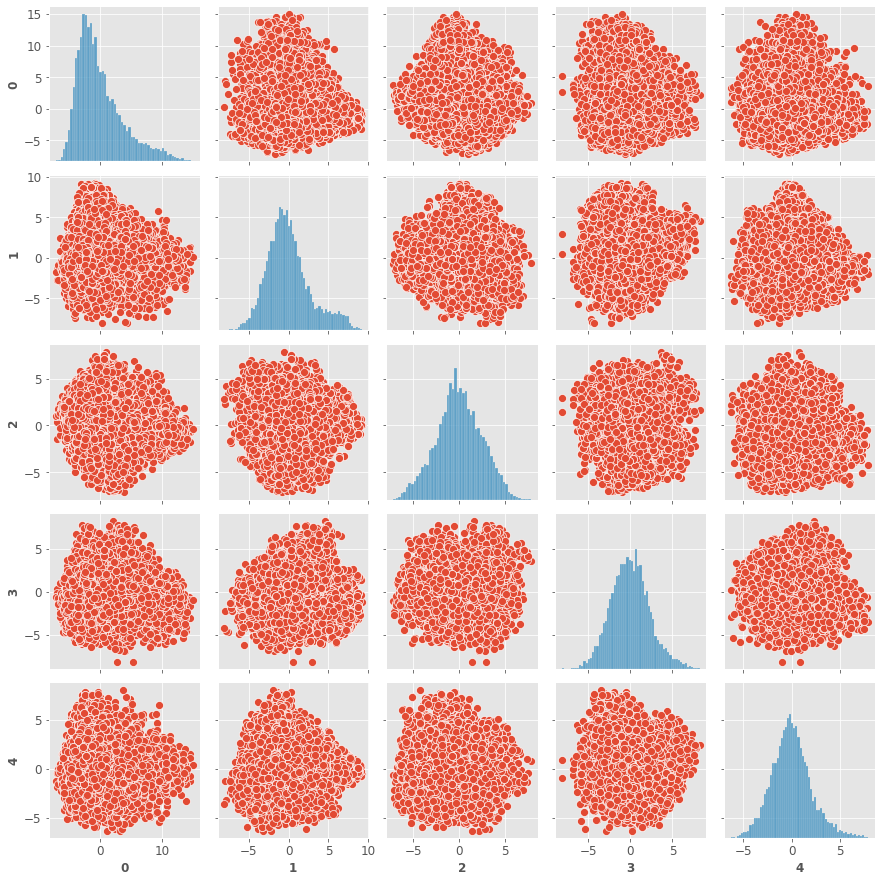

In [7]:
sns.pairplot(pca_data)

In [8]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
# ,index=data.index
print(cos_sim_data)
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:11]
  movies_recomm =  data['name'].loc[index_recomm].values
  result = {'Items':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('Bought this item : %s \n'%(data['name'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('Recommended items is this one: %s \n'%(movie))
  if print_recommendation_plots==True:
    print('The plot of the bougth item is this one:\n %s \n'%(data['description'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['description'].loc[index_recomm[q]]
      print('The plot of the number %i recommended items is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the bought item is this one:\n %s \n'%(data['categories'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['categories'].loc[index_recomm[q]]
      print('The plot of the number %i recommended item is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

          0         1         2         3         4         5         6      \
0      1.000000  0.570149  0.584298  0.585046  0.591103  0.608803  0.903862   
1      0.570149  1.000000  0.991755  0.960297  0.987535  0.522235  0.524182   
2      0.584298  0.991755  1.000000  0.955950  0.982566  0.533166  0.539658   
3      0.585046  0.960297  0.955950  1.000000  0.954755  0.536390  0.524960   
4      0.591103  0.987535  0.982566  0.954755  1.000000  0.530012  0.537434   
...         ...       ...       ...       ...       ...       ...       ...   
12548  0.503269  0.637296  0.646648  0.592170  0.650508  0.537114  0.488657   
12549  0.517306  0.505275  0.505032  0.499116  0.478615  0.486591  0.519455   
12550  0.571999  0.553995  0.533999  0.535551  0.540339  0.608610  0.493396   
12551  0.614024  0.439320  0.441760  0.441222  0.428019  0.564527  0.626246   
12552  0.597147  0.486737  0.486489  0.599562  0.479160  0.544601  0.555302   

          7         8         9      ...     12543 

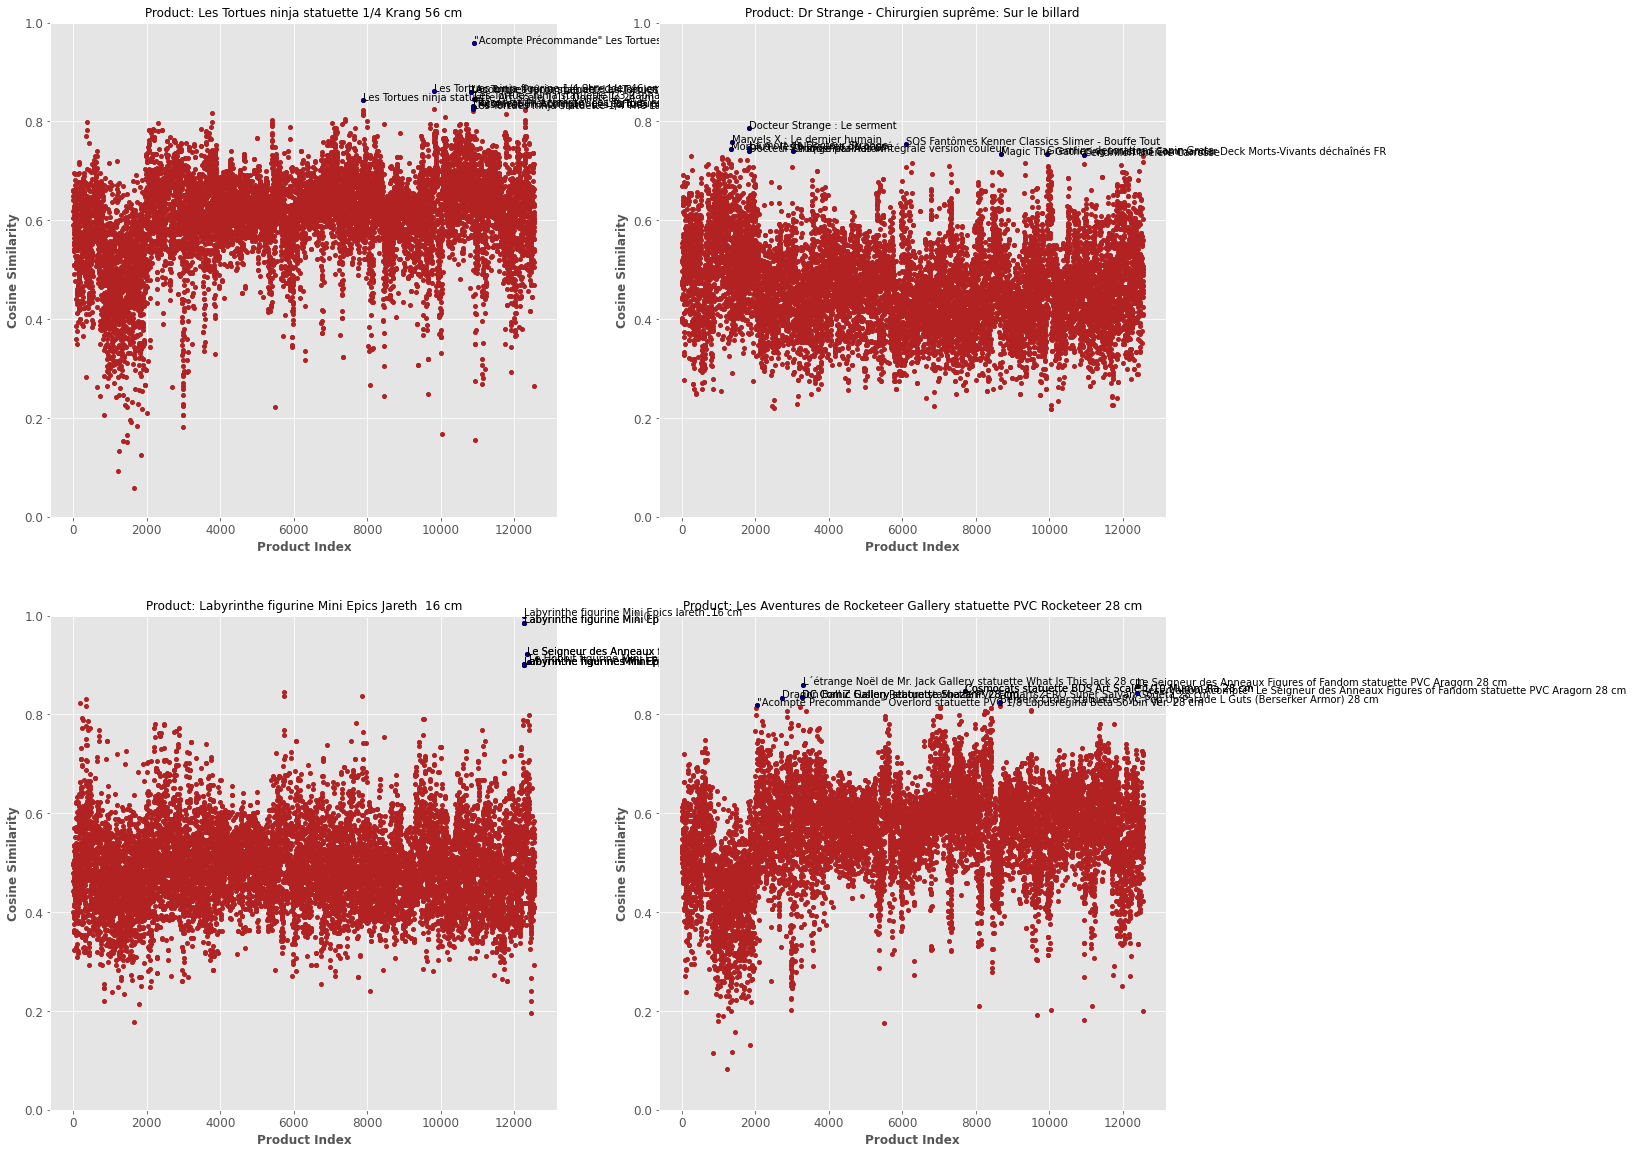

In [9]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.iloc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Items']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Product: '+data['name'].loc[index])
  plt.xlabel('Product Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [14]:
Y = np.array(data.name)
Z2 = np.where(Y == 'Retour vers le futur figurine Ultimate Tales from Space Marty McFly 18 cm')
give_recommendations(9819, True)


Bought this item : Retour vers le futur 2 figurine Ultimate Doc Brown (2015) 18 cm 

Recommended items is this one: Retour vers le futur 2 figurine Ultimate Doc Brown (2015) 18 cm 

Recommended items is this one: Retour vers le futur figurine Ultimate Doc Brown 18 cm 

Recommended items is this one: Retour vers le futur figurine Ultimate Doc Brown 18 cm 

Recommended items is this one: Retour vers le futur figurines 15 cm Toony Classics série 1 Doc Brown 

Recommended items is this one: Retour vers le futur II figurine Mini Co. PVC Doc Brown 15 cm 

Recommended items is this one: Retour vers le futur figurine Ultimate Doc Brown (1985) 18 cm 

Recommended items is this one: Retour vers le futur figurine Ultimate Doc Brown (1985) 18 cm 

Recommended items is this one: Retour vers le futur 2 figurine Ultimate Marty McFly 18 cm 

Recommended items is this one: Hasbro - Star Wars Black Series - Figurine Sith Trooper SDCC 2019 Exclusive 15 cm 

Recommended items is this one: Star Wars Rogue 

{'Items': array(['Retour vers le futur 2 figurine Ultimate Doc Brown (2015) 18 cm',
        'Retour vers le futur figurine Ultimate Doc Brown 18 cm',
        'Retour vers le futur figurine Ultimate Doc Brown 18 cm',
        'Retour vers le futur figurines 15 cm Toony Classics série 1 Doc Brown',
        'Retour vers le futur II figurine Mini Co. PVC Doc Brown 15 cm',
        'Retour vers le futur figurine Ultimate Doc Brown (1985) 18 cm',
        'Retour vers le futur figurine Ultimate Doc Brown (1985) 18 cm',
        'Retour vers le futur 2 figurine Ultimate Marty McFly 18 cm',
        'Hasbro - Star Wars Black Series - Figurine Sith Trooper SDCC 2019 Exclusive 15 cm',
        'Star Wars Rogue One Black Series figurine 2021 Baze Malbus  15 cm'],
       dtype=object),
 'Index': [9818, 9815, 9814, 9812, 7977, 9823, 9822, 9810, 11217, 6333]}

In [20]:
from difflib import SequenceMatcher
Zarray = [
'Retour vers le futur figurine Ultimate Tales from Space Marty McFly 18 cm',
'Boglins Topor "Glow in the Dark"  "First Edition"',
'DIGIMON CARD GAME JCC - Starter Deck 8 UlforceVeedram EN (09/2021)',
'The Batman Movie statuette PVC The Batman (Gold Label)  30 cm',
'Retour vers le futur figurine Ultimate Biff Tannen 18 cm',
'Boglins Dark Lord Bog O Bones  "Glow in the Dark"',
'Boglins Topor "Glow in the Dark"  "First Edition"',
'DC Multiverse figurine Batman Of Zur-En-Arrh  18 cm',
'DC Justice League Movie figurine Superman Black Suit 18 cm',
'DC Multiverse figurine Build A Wonder Woman Endless Winter  18 cm',
        ]
for x in Zarray:
    print(x)
    Z1 = np.where(Y == x)
    print(Z1)
    sim = SequenceMatcher(None, Y[Z1[0][0].tolist()], Y[Z2[0][0].tolist()]).ratio()
    print("Similarity between two strings is: " + str(sim) )
    

Retour vers le futur figurine Ultimate Tales from Space Marty McFly 18 cm
(array([9806]),)
Similarity between two strings is: 1.0
Boglins Topor "Glow in the Dark"  "First Edition"
(array([725, 726]),)
Similarity between two strings is: 0.2459016393442623
DIGIMON CARD GAME JCC - Starter Deck 8 UlforceVeedram EN (09/2021)
(array([12204]),)
Similarity between two strings is: 0.2302158273381295
The Batman Movie statuette PVC The Batman (Gold Label)  30 cm
(array([8933, 8934]),)
Similarity between two strings is: 0.2835820895522388
Retour vers le futur figurine Ultimate Biff Tannen 18 cm
(array([9807]),)
Similarity between two strings is: 0.7441860465116279
Boglins Dark Lord Bog O Bones  "Glow in the Dark"
(array([3096, 3097]),)
Similarity between two strings is: 0.2459016393442623
Boglins Topor "Glow in the Dark"  "First Edition"
(array([725, 726]),)
Similarity between two strings is: 0.2459016393442623
DC Multiverse figurine Batman Of Zur-En-Arrh  18 cm
(array([9042, 9043]),)
Similarity b

#### 